<a href="https://colab.research.google.com/github/KiranVarghese25/AML_lab/blob/main/AML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#loading the data
data=pd.read_csv("/content/Program_2_Dataset.csv")
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
#declaring the predictors and the target variable
x=data[['Avg_rooms ','Property_TaxRate','Non_Retail_Acres','Distance']]
y=data['MValue']

In [ ]:
#Calculating the VIF
vif=pd.Series([variance_inflation_factor(x.values,idx)
    for idx in range(x.shape[1])],
    index=x.columns)

print(vif)

Avg_rooms           16.747965
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
Distance             6.880607
dtype: float64


Inference:-From the above variance influence factor(VIF) we can observe that there is a significant level of multicolinearity.As the threshold value for vif is 10 , the column "Property_TaxRate" cannot be considered while building the model.

In [ ]:
#Final list of predictors
x=x.drop(['Property_TaxRate','Avg_rooms '],axis=1)
x.head()

,Non_Retail_Acres,Distance
0,2.89,3.4952
1,8.56,2.7778
2,8.56,2.8561
3,8.56,2.7147
4,8.56,2.7147


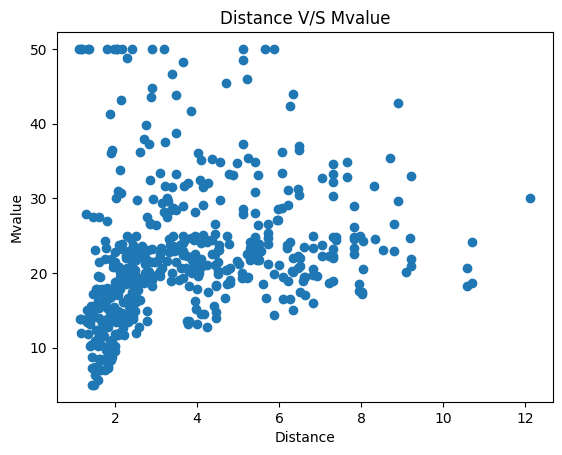

In [ ]:
#Avg_rooms V/S MValue
plt.scatter(x['Distance'],y)
plt.xlabel('Distance')
plt.ylabel('Mvalue')
plt.title('Distance V/S Mvalue')
plt.show()

Inference:- The above plot is scatter plot of "Distance"(predictor) V/S the "MValue"(target).The graph has been plotted in order to explore the relationship between the variables.From the graph we can observe that the columns have a positive correlation.

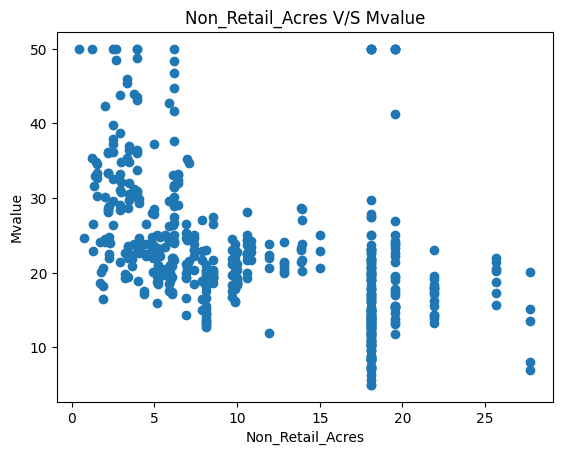

In [ ]:
#Avg_rooms V/S MValue
plt.scatter(x['Non_Retail_Acres'],y)
plt.xlabel('Non_Retail_Acres')
plt.ylabel('Mvalue')
plt.title('Non_Retail_Acres V/S Mvalue')
plt.show()

Inference:- The above plot is scatter plot of "Non_Retail_Acres"(predictor) V/S the "MValue"(target).The graph has been plotted in order to explore the relationship between the variables.From the graph we can observe that the columns have a negative correlation.

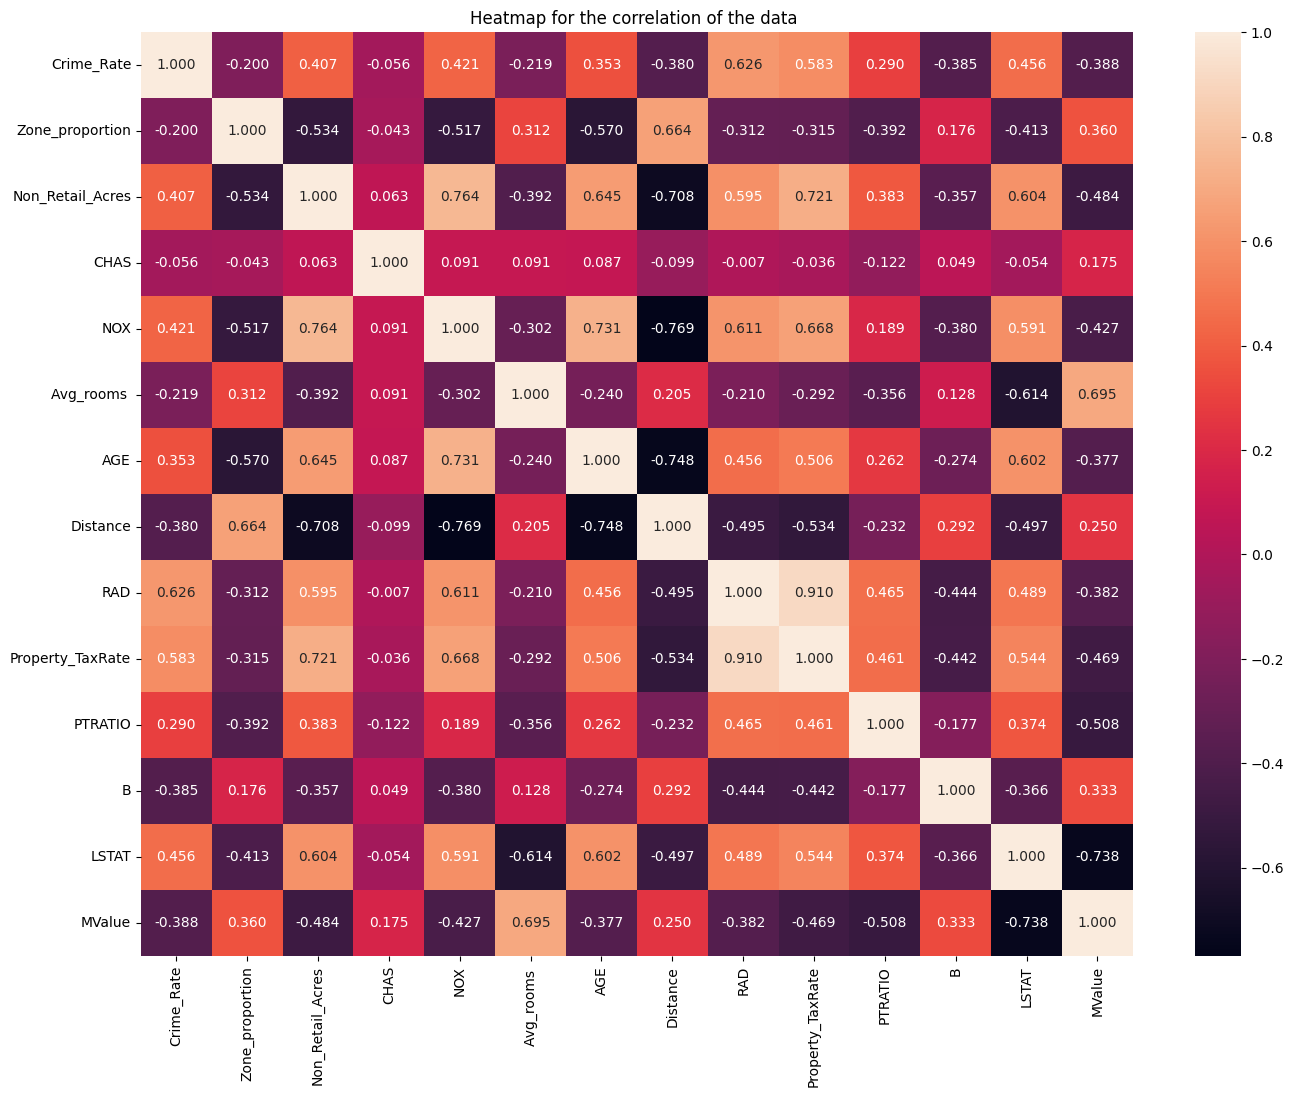

In [ ]:
#heatmap to plot the correaltion of all the columns
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.title('Heatmap for the correlation of the data ')
plt.show()

In [ ]:
#Splitting the dataset(test size:33 and train size :67)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
#Building the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#making predictions on the test data

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


In [ ]:
#Interceopt and Coeffiencients
print('Interceopt: ',model.intercept_,'\nCoeffiencients',model.coef_)

Interceopt:  38.09122570952144 
Coeffiencients [-0.9452116  -1.27856928]


In [ ]:
#Evaluation metrics

#mean squared error
mean_sqrd_error_train=mean_squared_error(y_train, y_pred_train)


mean_sqrd_error_test=mean_squared_error(y_test, y_pred_test)

print("The mean squared error(training dataset) for the model is:-",mean_sqrd_error_train)
print("The mean squared error(testing dataset) for the model is:-",mean_sqrd_error_test)

The mean squared error(training dataset) for the model is:- 67.67782670758362
The mean squared error(testing dataset) for the model is:- 55.77063948894478


The above metric is used to calculate the average of sqaured differeces between the predicted value and the actual value.Lower the mse it means that higher is the prediction accuracy of the model or there are fewer errors.The values are large and hence suggesting the difference between the predicted and the actual values are large.

In [ ]:
#R^2
r_sqrd_train= r2_score(y_train, y_pred_train)
r_sqrd_test= r2_score(y_test, y_pred_test)

print("The R^2 squared value(train data) for the model is:-",r_sqrd_train)
print("The R^2 squared value(test data) for the model is:-",r_sqrd_test)

The R^2 squared value(train data) for the model is:- 0.2581499484166436
The R^2 squared value(test data) for the model is:- 0.20665217673469416


The above metric is used to calculate the goodness of fit for the model.The R^2 value for the train data is 0.2581 and 0.2066 for the test data which basically means that the moel does not fit the very well with given data.

In [ ]:
#Adjusted R^2

#Training data
sample_size_train=len(y_train)
nos_ind_var=2
adj_r_sqrd=(1-r_sqrd_train)*(sample_size_train-1)/(sample_size_train-nos_ind_var-1)
print("The Adjusted R^2 squared value(train) for the model is:-",adj_r_sqrd)


#Testing data
sample_size_test=len(y_test)
nos_ind_var=2
adj_r_sqrd=(1-r_sqrd_test)*(sample_size_test-1)/(sample_size_test-nos_ind_var-1)
print("The Adjusted R^2 squared value(test) for the model is:-",adj_r_sqrd)

The Adjusted R^2 squared value(train) for the model is:- 0.746265825699924
The Adjusted R^2 squared value(test) for the model is:- 0.8030227967197608


The above metric is modified version of the R^2 score,it takes into consideration the nos of predictors used.From the scores we can see that the adjusted R^2 value(train) is 0.746 or 74.62% which basically means that 74.62% of the variablity in the data has been explained by the model  where as the adjusted R^2 value(train) is 0.803 or 80.3022 which basically means that 80% of the variablity has been explained by the model.It has been noted that by taking into consoderation the nos of predictors in the model the models accuracy inscreases.